In [1]:
import numpy as np
from abdCalcs import ABD
from MomInertia import moments_of_inertia
from scipy.interpolate import interp1d
from SurfboardGeneration import offset, surfboard_outline
import matplotlib.pyplot as plt

### Define Material Properties

In [2]:
#6oz lamina (not accurate Values)
E1_6 = 29.7E9
E2_6 = 29.7E9
G12_6 = 5.3E9
v12_6 = 0.17
t = .25E-3;#meters

#4oz lamina (also not accurate)
E1_4 = E1_6*.85
E2_4 = E2_6*.85
G12_4 = G12_6*.85
v12_4 = v12_6
rho_4 = 539.99 #kg/m^3

#EPS Foam (from matWeb)
E1_eps = 3.80E7
E2_eps = E1_eps
G12_eps = 1.9E7
v13_eps = 0.32
h_eps = 2 *.0254 #2 inch thick foam coupon with plies wrapped around it
w_eps = 10 * .0254 #10 inches wide just randomly tbh. 
rho_eps = .0545 * 1000 #kg/m^3

#PU Foam (from matweb)
E1_pu = .220E9
E2_pu = E1_pu
rho_pu = .240 * 1000  #kg/m^3
h_pu = h_eps
w_pu = w_eps

#Stringer (Balsa from matWeb);
E1_balsa = 2.20E9
E2_balsa = E1_balsa
G12_balsa = .106E9
v12_balsa = .25 #from GPT
w_balsa = 0.125 * .0254

#Stringer (Basswood from matWeb)
E1_basswood = 7.1E9
E2_basswood = E1_basswood
w_basswood = w_balsa
rho_basswood = 320 #kg/m^3

#Carbon
E1_carbon = 150E9
rho_carbon = 1600 #kg/m^3 (estimated)

#Top Lam ABD - Effective Moduli [4/4]
A_top,B_top,D_top = ABD([E1_4, E1_4],[E2_4, E2_4], [G12_4, G12_4], [v12_4, v12_4], [0, 0], t)
a = np.linalg.inv(A_top)
E1_top = 1/(a[0,0]*(2*t))
E2_top = 1/(a[1,1]*(2*t))
G12_top = 1/(a[2,2]*(2*t))
v12 = -1*(a[1,0]/a[0,0])

#Side Lam
A_side,B_side,D_side = ABD([E1_4, E1_4, E1_4],[E2_4, E2_4, E2_4], [G12_4, G12_4, G12_4], [v12_4, v12_4, v12_4], [0, 0, 0], t)
a = np.linalg.inv(A_side)
E1_side = 1/(a[0,0]*(2*t))
E2_side = 1/(a[1,1]*(2*t))
G12_side = 1/(a[2,2]*(2*t))
v12_sdie = -1*(a[1,0]/a[0,0])


### Design of Rectangular Coupon Cross Sections

#### Traditional PU surfboard

###### [4/4] on the top and [4] on the bottom, E-glass. Standard. Stringer is 1/8 inch wide basswood




EIzz = 593513.7000600819 (Nm^2)
Weight is 2.551248719558179 (lbs)
 *Assuming 14" long coupon


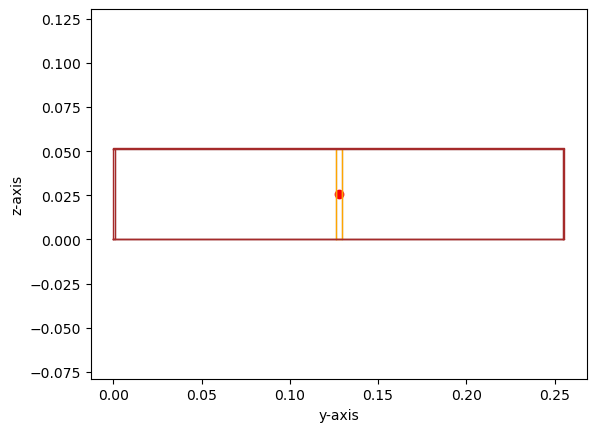

In [3]:
#Coordinates of Cross Section
bot_lam = [[0,6*t+w_pu,6*t+w_pu,0],[0,0,t,t]]
left_lam = [[0, 3*t, 3*t, 0],[t,t,t+h_pu,t+h_pu]]
foam_left = [[3*t, 3*t+(w_pu/2)-(w_basswood/2),3*t+(w_pu/2)-(w_basswood/2),3*t],[t,t,t+h_pu,t+h_pu]]
string = [[3*t+(w_pu/2)-(w_basswood/2),3*t+(w_pu/2)+(w_basswood/2),3*t+(w_pu/2)+(w_basswood/2),3*t+(w_pu/2)-(w_basswood/2)],[t,t,t+h_pu,t+h_pu]]
foam_right = [[3*t+(w_pu/2)+(w_basswood/2),3*t+w_pu,3*t+w_pu,3*t+(w_pu/2)+(w_basswood/2)],[t,t,t+h_pu,t+h_pu]]
right_lam = [[3*t+w_pu,6*t+w_pu,6*t+w_pu,3*t+w_pu],[t,t,t+h_pu,t+h_pu]]
top_lam = [[0,6*t+w_pu,6*t+w_pu,0],[t+h_pu,t+h_pu,3*t+h_pu,3*t+h_pu]]

#Inputs for Moment of Inertia Calcs
yzs = np.array([foam_left,foam_right,string,bot_lam,top_lam,left_lam,right_lam])
E = [E1_pu,E1_pu,E1_basswood,E1_4,E1_top,E1_side,E1_side]
mats = {'Foam Left':['silver',rho_pu],'Foam Right':['silver',rho_pu],'Stringer':['orange',rho_basswood],'Bot Lam':['brown',rho_4]\
        ,'Top Lam':['brown',rho_4],'Left Lam':['brown',rho_4],'Right Lam':['brown',rho_4]}
EIyy, EIzz, EIyz, EA, weight = moments_of_inertia(yzs, E, mats)
print(f"\n\n\nEIzz = {EIzz} (Nm^2)\nWeight is {weight*2.20462262} (lbs)\n *Assuming 14\" long coupon")

#### PU with Carbon Fiber Horizontal Stringer

###### EIzz is more than double the PU with the Balsa wood stringer, while the weight is nearly identical. This is with a single carbon ply very close to the middle of the board. 




EIzz = 1299817.1885682207 (Nm^2)
Weight is 2.608836191891756 (lbs)
 *Assuming 14" long coupon


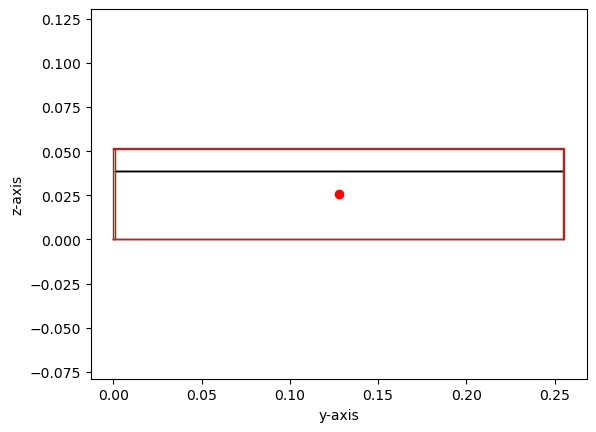

In [4]:
#Coordinates of Cross Section
NA = (3*t+h_pu)/2
x = 0.5 *.0254 #Carbon Fiber bottom from NA
num_ply_carbon = 1

bot_lam = [[0,6*t+w_pu,6*t+w_pu,0],[0,0,t,t]]
left_lam = [[0, 3*t, 3*t, 0],[t,t,t+h_pu,t+h_pu]]
foam_bot = [[3*t, 3*t+w_pu,3*t+w_pu,3*t],[t,t,t+NA+x,t+NA+x]]
foam_top = [[3*t,3*t+w_pu,3*t+w_pu,3*t],[t+NA+x+num_ply_carbon*t,t+NA+x+num_ply_carbon*t,t+h_pu,t+h_pu]]
carbon = [[3*t,3*t+w_pu,3*t+w_pu,3*t],[t+NA+x,t+NA+x,t+NA+x+num_ply_carbon*t,t+NA+x+num_ply_carbon*t]]
right_lam = [[3*t+w_pu,6*t+w_pu,6*t+w_pu,3*t+w_pu],[t,t,t+h_pu,t+h_pu]]
top_lam = [[0,6*t+w_pu,6*t+w_pu,0],[t+h_pu,t+h_pu,3*t+h_pu,3*t+h_pu]]

#Inputs for Moment of Inertia Calcs
yzs = np.array([foam_bot,foam_top,carbon,bot_lam,top_lam,left_lam,right_lam])
E = [E1_pu,E1_pu,E1_carbon,E1_4,E1_top,E1_side,E1_side]
mats = {'Foam Bot':['silver',rho_pu],'Foam Top':['silver',rho_pu],'Carbon':['black',rho_carbon],'Bot Lam':['brown',rho_4]\
        ,'Top Lam':['brown',rho_4],'Left Lam':['brown',rho_4],'Right Lam':['brown',rho_4]}
EIyy, EIzz, EIyz, EA, weight = moments_of_inertia(yzs, E, mats)
print(f"\n\n\nEIzz = {EIzz} (Nm^2)\nWeight is {weight*2.20462262} (lbs)\n *Assuming 14\" long coupon")

#### EPS with Carbon Horizontal

###### Even with EPS foam and the carbon stringer right on the neutral axis it is about twice as stiff, and the weight is about 60% the weight with the PU and the carbon. This is good it means we have room to get more flexible skin materials because we don't need as much stiffness from the glass.




EIzz = 1149054.5610618237 (Nm^2)
Weight is 1.6936966835223766 (lbs)
 *Assuming 14" long coupon


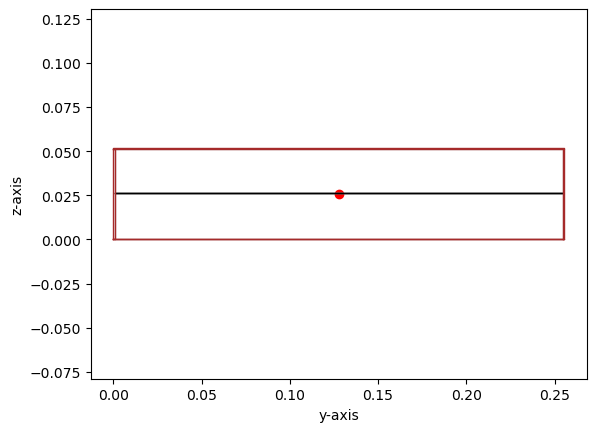

In [5]:
#Coordinates of Cross Section
NA = (3*t+h_eps)/2
x = 00 *.0254 #Carbon Fiber bottom from NA
num_ply_carbon = 1

bot_lam = [[0,6*t+w_eps,6*t+w_eps,0],[0,0,t,t]]
left_lam = [[0, 3*t, 3*t, 0],[t,t,t+h_eps,t+h_eps]]
foam_bot = [[3*t, 3*t+w_eps,3*t+w_eps,3*t],[t,t,t+NA+x,t+NA+x]]
foam_top = [[3*t,3*t+w_eps,3*t+w_eps,3*t],[t+NA+x+num_ply_carbon*t,t+NA+x+num_ply_carbon*t,t+h_eps,t+h_eps]]
carbon = [[3*t,3*t+w_eps,3*t+w_eps,3*t],[t+NA+x,t+NA+x,t+NA+x+num_ply_carbon*t,t+NA+x+num_ply_carbon*t]]
right_lam = [[3*t+w_eps,6*t+w_eps,6*t+w_eps,3*t+w_eps],[t,t,t+h_eps,t+h_eps]]
top_lam = [[0,6*t+w_eps,6*t+w_eps,0],[t+h_eps,t+h_eps,3*t+h_eps,3*t+h_eps]]

#Inputs for Moment of Inertia Calcs
yzs = np.array([foam_bot,foam_top,carbon,bot_lam,top_lam,left_lam,right_lam])
E = [E1_eps,E1_eps,E1_carbon,E1_4,E1_top,E1_side,E1_side]
mats = {'Foam Bot':['silver',rho_pu],'Foam Top':['silver',rho_eps],'Carbon':['black',rho_carbon],'Bot Lam':['brown',rho_4]\
        ,'Top Lam':['brown',rho_4],'Left Lam':['brown',rho_4],'Right Lam':['brown',rho_4]}
EIyy, EIzz, EIyz, EA, weight = moments_of_inertia(yzs, E, mats)
print(f"\n\n\nEIzz = {EIzz} (Nm^2)\nWeight is {weight*2.20462262} (lbs)\n *Assuming 14\" long coupon")

### Design of Surfboard Cross Section Coupons

###### Creating Surfboard Outline Shape

In [6]:
width = 20 * .0254
thickness = 2.5 * .0254
t_values = None
n = 10000
x,y = surfboard_outline(width,thickness,n)

Effective thickness is 0.0635


##### EPS Board with Carbon Stringer

###### Defining Coordinates for all materials within surfboard cross section

In [7]:

carbon_loc = 0 * .0254
top_lam_loc_y = -.25*.0254 + .5*.0254
bot_lam_loc_y = -.25*.0254 - .5*.0254

t = .25E-3
idx_bot_foam = (np.abs(y[0:int(n/2)] - carbon_loc)).argmin()
idx_top_foam = (np.abs(y[0:int(n/2)] - (carbon_loc+t*1))).argmin()
idx_top_lam = (np.abs(y[0:int(n/2)] - (top_lam_loc_y))).argmin()
idx_bot_lam = (np.abs(y[0:int(n/2)] - (bot_lam_loc_y))).argmin()

top_foam = [x[idx_top_foam:int(n/2)+(int(n/2)-idx_top_foam)],y[idx_top_foam:int(n/2)+(int(n/2)-idx_top_foam)]]

bot_foam = [np.append(x[0:idx_bot_foam],x[-idx_bot_foam:]),np.append(y[0:idx_bot_foam],y[-idx_bot_foam:])]

carbon = [np.append(x[idx_bot_foam:idx_top_foam],x[-idx_top_foam:-idx_bot_foam]),np.append(y[idx_bot_foam:idx_top_foam],y[-idx_top_foam:-idx_bot_foam])]

top_lam_bottom_layer = [x[idx_top_lam:int(n/2)+(int(n/2)-idx_top_lam)],y[idx_top_lam:int(n/2)+(int(n/2)-idx_top_lam)]]
top_lam_offset_x,top_lam_offset_y = offset(top_lam_bottom_layer[0],top_lam_bottom_layer[1],t*200)
top_lam = [np.append(top_lam_bottom_layer[0],np.flip(top_lam_offset_x)),np.append(top_lam_bottom_layer[1],np.flip(top_lam_offset_y))] 

left_lam_bottom_layer = [x[idx_bot_lam:idx_top_lam],y[idx_bot_lam:idx_top_lam]]
left_lam_offset_x,left_lam_offset_y = offset(left_lam_bottom_layer[0],left_lam_bottom_layer[1],t*3)
left_lam = [np.append(left_lam_bottom_layer[0],np.flip(left_lam_offset_x)),np.append(left_lam_bottom_layer[1],np.flip(left_lam_offset_y))] 

right_lam_bottom_layer = [x[-idx_top_lam:-idx_bot_lam],y[-idx_top_lam:-idx_bot_lam]]
right_lam_offset_x,right_lam_offset_y = offset(right_lam_bottom_layer[0],right_lam_bottom_layer[1],t*3)
right_lam = [np.append(right_lam_bottom_layer[0],np.flip(right_lam_offset_x)),np.append(right_lam_bottom_layer[1],np.flip(right_lam_offset_y))] 

bot_lam_bottom_left_layer = [x[0:idx_bot_lam],y[0:idx_bot_lam]]
bot_lam_left_offset_x,bot_lam_left_offset_y = offset(bot_lam_bottom_left_layer[0],bot_lam_bottom_left_layer[1],t*1)
bot_left_lam = [np.append(bot_lam_bottom_left_layer[0],np.flip(bot_lam_left_offset_x)),np.append(bot_lam_bottom_left_layer[1],np.flip(bot_lam_left_offset_y))] 

bot_lam_bottom_right_layer = [x[-idx_bot_lam:],y[-idx_bot_lam:]]
bot_lam_right_offset_x,bot_lam_right_offset_y = offset(bot_lam_bottom_right_layer[0],bot_lam_bottom_right_layer[1],t*1)
bot_right_lam = [np.append(bot_lam_bottom_right_layer[0],np.flip(bot_lam_right_offset_x)),np.append(bot_lam_bottom_right_layer[1],np.flip(bot_lam_right_offset_y))] 

###### Calculating Bending Properties




EIzz = 193938915732.37177 (Nm^2)
Weight is 11.8220914183862 (lbs)
 *Assuming 14" long coupon


C:\Users\mmdul\AppData\Local\Temp\ipykernel_6952\3316436551.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  yzs = np.array([bot_foam,top_foam,carbon,bot_left_lam,bot_right_lam,top_lam,left_lam,right_lam])


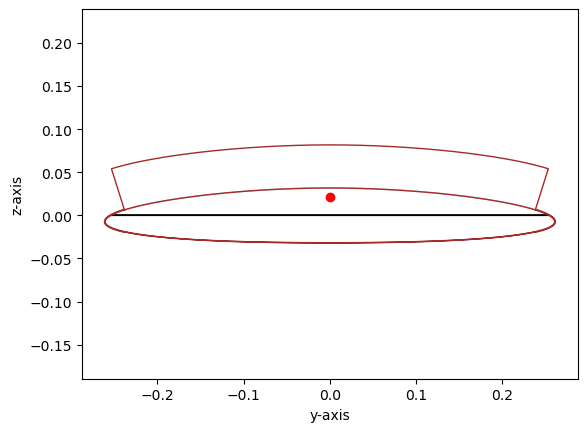

In [8]:
yzs = np.array([bot_foam,top_foam,carbon,bot_left_lam,bot_right_lam,top_lam,left_lam,right_lam])
E = [E1_eps,E1_eps,E1_carbon,E1_top,E1_side,E1_side,E1_4,E1_4]
mats = {'Foam Bot Left':['silver',rho_eps],'Foam Top':['silver',rho_eps],'Carbon':['black',rho_carbon],'Bot Left Lam':['brown',rho_4], 'Bot Right Lam':['brown',rho_4]\
        ,'Top Lam':['brown',rho_4],'Left Lam':['brown',rho_4],'Right Lam':['brown',rho_4]}
EIyy, EIzz, EIyz, EA, weight = moments_of_inertia(yzs, E, mats)
plt.axis('equal')
print(f"\n\n\nEIzz = {EIzz} (Nm^2)\nWeight is {weight*2.20462262} (lbs)\n *Assuming 14\" long coupon")

##### EPS Board with Wood Stringer

###### Coordinates for Wood Stringer Materials

(-0.2867762905177984, 0.2867762905177985, -0.034925, 0.034925)

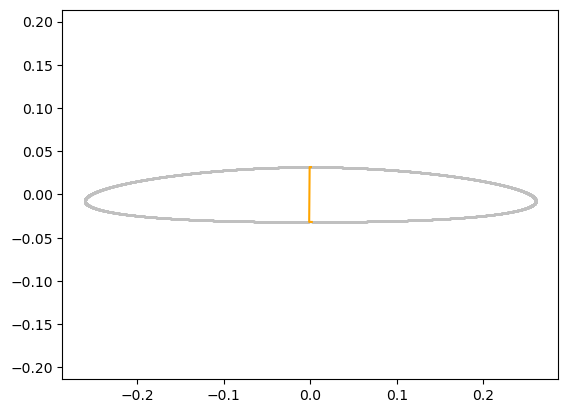

In [9]:
stringer_thickness = .125 * .0254
top_lam_loc_y = -.25*.0254 + .5*.0254
bot_lam_loc_y = -.25*.0254 - .5*.0254

t = .25E-3
idx_left_foam = (np.abs(x[0:int(n/4)] + stringer_thickness/2)).argmin()

left_foam = [x[idx_left_foam:int(n/2)-idx_left_foam],y[idx_left_foam:int(n/2)-idx_left_foam]]

right_foam = [x[int(n/2)+idx_left_foam:n-idx_left_foam],y[int(n/2)+idx_left_foam:n-idx_left_foam]]

stringer = [np.append(np.append(x[n-idx_left_foam:],x[0:idx_left_foam]),x[int(n/2-idx_left_foam):int(n/2+idx_left_foam)]), np.append(np.append(y[n-idx_left_foam:],y[0:idx_left_foam]),y[int(n/2-idx_left_foam):int(n/2+idx_left_foam)]) ]

plt.scatter(left_foam[0],left_foam[1],s=.25,color='silver')
plt.scatter(right_foam[0],right_foam[1],s=.25,color='silver')
plt.plot(stringer[0],stringer[1],color='orange')
plt.axis('equal')

###### Calculating Bending Properties

C:\Users\mmdul\AppData\Local\Temp\ipykernel_6952\1415689815.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  yzs = np.array([left_foam,right_foam,stringer,bot_left_lam,bot_right_lam,top_lam,left_lam,right_lam])





EIzz = 193906523297.70178 (Nm^2)
Weight is 11.71094521072614 (lbs)
 *Assuming 14" long coupon


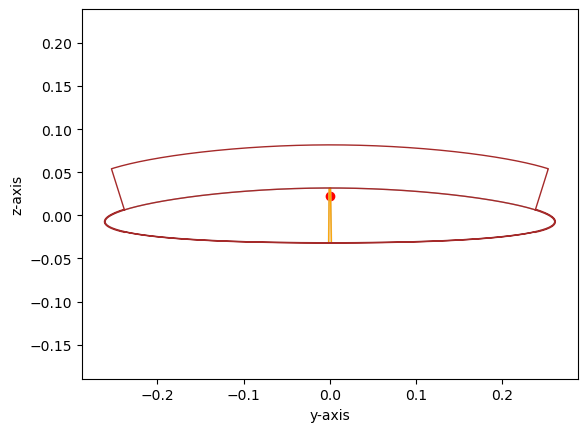

In [10]:
yzs = np.array([left_foam,right_foam,stringer,bot_left_lam,bot_right_lam,top_lam,left_lam,right_lam])
E = [E1_eps,E1_eps,E1_carbon,E1_top,E1_side,E1_side,E1_4,E1_4]
mats = {'Left Foam':['silver',rho_eps],'Foam Right':['silver',rho_eps],'Stringer':['orange',rho_basswood],'Bot Left Lam':['brown',rho_4], 'Bot Right Lam':['brown',rho_4]\
        ,'Top Lam':['brown',rho_4],'Left Lam':['brown',rho_4],'Right Lam':['brown',rho_4]}
EIyy, EIzz, EIyz, EA, weight = moments_of_inertia(yzs, E, mats)
plt.axis('equal')
print(f"\n\n\nEIzz = {EIzz} (Nm^2)\nWeight is {weight*2.20462262} (lbs)\n *Assuming 14\" long coupon")